## **Project Name**    -   Netflix Movies & TV Shows Clustering



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Member 1 - Bhumika Patil**


# **Project Summary -**

# Unsupervised ML – Netflix Movies and TV Shows Clustering

*  This project focuses on applying unsupervised machine learning techniques to cluster Netflix movies and TV shows based on their textual content and metadata. The dataset consists of Netflix titles available up to 2019 and includes features such as type (Movie/TV Show), director, cast, country, release year, rating, genre (listed_in), and description. The primary objective of this project is to identify natural groupings within the content library to

*  help understand content segmentation, audience targeting, and potential business strategies.

*  The project begins with Exploratory Data Analysis (EDA) to understand the structure and distribution of the dataset. Initial analysis highlights the growth of TV shows over recent years, confirming Netflix’s strategic shift from movies toward series-based content. The United States appears as the largest content producer, followed by other countries contributing region-specific content. Visualization techniques such as count plots, line graphs, and distribution charts are used to analyze content type trends, release year growth, and country-wise contributions. Hypotheses are formed based on these insights, such as whether Netflix is increasingly focusing on TV shows and whether certain genres dominate specific clusters.

*  Data cleaning is performed to handle missing values in columns like director, cast, country, and rating. Missing categorical values are replaced with appropriate placeholders or mode values to maintain data integrity. Duplicate records are removed to ensure accurate modeling. Feature engineering is then conducted by combining important text-based features such as description, genre (listed_in), and director into a single consolidated text feature. This helps capture meaningful semantic relationships between titles.

*  To convert textual data into numerical format, the TF-IDF (Term Frequency–Inverse Document Frequency) vectorization technique is applied. TF-IDF transforms text into a weighted numerical matrix that reflects the importance of words in each document relative to the entire dataset. This representation enables clustering algorithms to group similar content effectively.

*  Two clustering algorithms are implemented to fulfill project requirements: K-Means Clustering and Agglomerative (Hierarchical) Clustering. The Elbow Method is used to determine the optimal number of clusters, while the Silhouette Score evaluates clustering performance. K-Means groups the content into distinct clusters by minimizing within-cluster variance, whereas Agglomerative Clustering builds clusters hierarchically based on distance metrics. Comparative evaluation shows which algorithm produces more cohesive clusters.

*  Principal Component Analysis (PCA) is applied to reduce high-dimensional TF-IDF features into two components for visualization purposes. Cluster visualization provides a clear graphical representation of how titles are grouped. Further analysis of each cluster reveals dominant genres or themes, such as action-oriented content, romantic dramas, documentaries, children’s programming, or international titles.

*  From a business perspective, the clustering results provide valuable insights for stakeholders. Netflix can use these clusters to enhance recommendation systems, improve targeted marketing campaigns, design region-specific promotions, and allocate content budgets effectively. Understanding content segments also helps in identifying underrepresented categories and planning future content acquisitions.

*  In conclusion, this project demonstrates how unsupervised machine learning techniques can uncover meaningful patterns within large streaming datasets. By integrating EDA, data preprocessing, TF-IDF vectorization, clustering algorithms, and model evaluation metrics, the project successfully segments Netflix content into interpretable clusters. These findings support strategic decision-making and showcase the practical application of machine learning in real-world entertainment analytics.

# **GitHub Link -**

https://github.com/BhumikaPatil42010/Project2ML-Netflix-Movies-TV-Shows-Clustering

# **Problem Statement**


With the rapid growth of digital streaming platforms, Netflix has significantly expanded its library of movies and TV shows across multiple genres, countries, and audience categories. As the volume of content increases, it becomes challenging to manually analyze patterns, similarities, and content segmentation within the platform’s catalog. Understanding how content can be grouped based on themes, genres, and textual descriptions is essential for improving recommendations, marketing strategies, and content acquisition decisions.

* The dataset used in this project contains information about Netflix movies and TV shows available up to 2019, including attributes such as title, type, director, cast, country, release year, rating, genre (listed_in), and description. However, the dataset does not contain predefined labels that categorize similar content into meaningful groups.

* The core problem is to apply unsupervised machine learning techniques to identify natural clusters within the Netflix content library using text-based features. By transforming textual information into numerical form using techniques like TF-IDF and applying clustering algorithms such as K-Means and Agglomerative Clustering, the project aims to group similar movies and TV shows together based on their characteristics.

* The key objectives of this problem are:

* To explore and analyze trends in Netflix content (Movies vs TV Shows, country-wise distribution, release trends).

* To preprocess and clean the dataset by handling missing values and preparing text features.

* To apply at least two clustering algorithms to segment the content into meaningful groups.

* To evaluate clustering performance using appropriate metrics such as the Silhouette Score.

* To interpret the formed clusters and provide business insights that can help stakeholders improve recommendation systems and strategic decision-making.

Ultimately, this project seeks to demonstrate how unsupervised machine learning can be used to discover hidden patterns in large-scale streaming datasets and generate actionable insights for business growth and customer engagement.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# ============================================================
# Project Name : Netflix Movies & TV Shows Clustering
# Type         : Unsupervised Machine Learning
# Description  : Content Clustering using TF-IDF & Clustering Algorithms
# ============================================================


# ------------------------------------------------------------
# 1️⃣  Basic Libraries for Data Handling
# ------------------------------------------------------------
try:
    import pandas as pd        # For data manipulation and analysis
    import numpy as np         # For numerical operations
except Exception as e:
    print("Error importing pandas/numpy:", e)


# ------------------------------------------------------------
# 2️⃣  Data Visualization Libraries
# ------------------------------------------------------------
try:
    import matplotlib.pyplot as plt   # For plotting graphs
    import seaborn as sns             # For statistical visualizations

    # Setting default style for better visualization
    sns.set_style("whitegrid")
    plt.rcParams["figure.figsize"] = (10,6)
except Exception as e:
    print("Error importing visualization libraries:", e)


# ------------------------------------------------------------
# 3️⃣  Text Processing Library
# ------------------------------------------------------------
try:
    from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to numerical features
except Exception as e:
    print("Error importing TfidfVectorizer:", e)


# ------------------------------------------------------------
# 4️⃣  Clustering Algorithms
# ------------------------------------------------------------
try:
    from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
except Exception as e:
    print("Error importing clustering algorithms:", e)


# ------------------------------------------------------------
# 5️⃣  Model Evaluation Metrics
# ------------------------------------------------------------
try:
    from sklearn.metrics import silhouette_score, davies_bouldin_score
except Exception as e:
    print("Error importing evaluation metrics:", e)


# ------------------------------------------------------------
# 6️⃣  Dimensionality Reduction
# ------------------------------------------------------------
try:
    from sklearn.decomposition import PCA
except Exception as e:
    print("Error importing PCA:", e)


# ------------------------------------------------------------
# 7️⃣  Utility Libraries
# ------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")   # Ignore warnings for clean notebook execution


print("All libraries imported successfully ✅")


All libraries imported successfully ✅


### Dataset Loading

In [2]:
# ============================================================
#  Load Dataset
# ============================================================

# Define file path (keep CSV in same folder as notebook for smooth execution)
file_path = "NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

try:
    # Reading the dataset
    df = pd.read_csv(file_path)

    # Confirm successful loading
    print("Dataset loaded successfully ✅")

    # Display first 5 rows
    display(df.head())

except FileNotFoundError:
    print("Error ❌: File not found. Please check the file path.")

except pd.errors.EmptyDataError:
    print("Error ❌: The file is empty.")

except Exception as e:
    print("Unexpected error occurred:", e)


Dataset loaded successfully ✅


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset First View

In [3]:

# 1) Dataset First View
# ============================================================

# Display first 5 rows of the dataset
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# ============================================================
# 2) Dataset Rows & Columns Count
# ============================================================

# Checking shape of dataset
rows, columns = df.shape

print(f"Number of Rows   : {rows}")
print(f"Number of Columns: {columns}")


Number of Rows   : 7787
Number of Columns: 12


### Dataset Information

In [5]:
# ============================================================
# 3) Dataset Information
# ============================================================

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# ============================================================
# 4) Dataset Duplicate Value Count
# ============================================================

# Checking duplicate rows
duplicate_count = df.duplicated().sum()

print(f"Total Duplicate Rows: {duplicate_count}")

# Removing duplicate rows (if any)
df = df.drop_duplicates()

print("Duplicates removed successfully ✅")



Total Duplicate Rows: 0
Duplicates removed successfully ✅


#### Missing Values/Null Values

In [7]:
# ============================================================
# 5) Missing Values/Null Values Count
# ============================================================

missing_values = df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


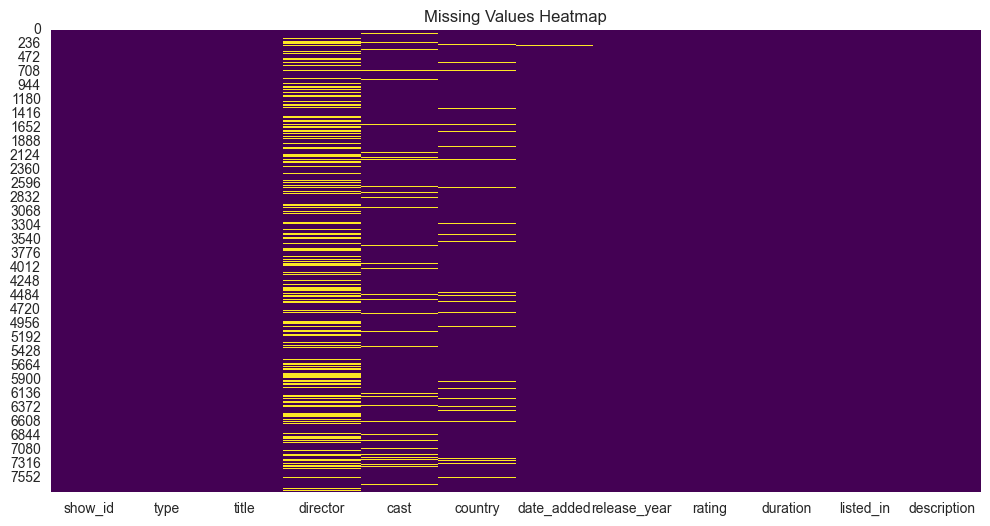

In [8]:
# Visualizing missing values using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

The dataset contains information about Netflix Movies and TV Shows available up to 2019. It includes important features such as type (Movie/TV Show), director, cast, country, release year, rating, genre (listed_in), duration, and description.

Most of the columns are categorical (text-based), making the dataset suitable for text processing and clustering techniques like TF-IDF. Some columns such as director, cast, and country contain missing values that need to be handled during preprocessing. Duplicate records may also need to be removed to ensure data quality.

The dataset shows a mix of global content, with increasing production in recent years. Since there are no predefined labels, it is appropriate for unsupervised learning methods like clustering to group similar content based on themes and descriptions.

From a business perspective, clustering this dataset can help improve recommendation systems, understand content distribution, and support strategic decision-making for content planning and marketing.

## ***2. Understanding Your Variables***

To understand all available variables before analysis and modeling.

In [9]:
# ============================================================
# Dataset Columns
# ============================================================

# Display all column names
print("Dataset Columns:\n")
print(df.columns.tolist())


Dataset Columns:

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [10]:
# ============================================================
# Dataset Describe (Numerical Summary)
# ============================================================

df.describe()


,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

The dataset contains the following variables:

Variable Name and Description

show_id	 - Unique identifier assigned to each movie or TV show.

type - Specifies whether the content is a Movie or a TV Show.

title -	Name of the movie or TV show.

director - Name of the director(s) of the content.

cast - List of main actors involved in the content.

country	- Country where the movie or TV show was produced.

date_added -	Date when the content was added to Netflix.

release_year - Original release year of the movie or TV show.

rating -	Age rating classification (e.g., TV-MA, PG-13, etc.).

duration -	Duration of the movie (in minutes) or number of seasons (for TV shows).

listed_in	- Genre or category of the content (e.g., Drama, Comedy, Action).

description	- Short summary describing the storyline or theme of the content.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
# ============================================================
# Unique Values Count for Each Column
# ============================================================

for column in df.columns:
    print(f"{column} : {df[column].nunique()} unique values")


show_id : 7787 unique values
type : 2 unique values
title : 7787 unique values
director : 4049 unique values
cast : 6831 unique values
country : 681 unique values
date_added : 1565 unique values
release_year : 73 unique values
rating : 14 unique values
duration : 216 unique values
listed_in : 492 unique values
description : 7769 unique values


In [12]:
# Check Unique Values in Detail (Optional but Recommended)
# For categorical columns:
# Example: Checking unique values of 'type'
df['type'].unique()

# Example: Checking unique values of 'rating'
df['rating'].unique()


array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# ============================================================
# 1) Handling Missing Values
# ============================================================

# Checking missing values
print("Missing Values Before Cleaning:\n")
print(df.isnull().sum())

# Filling categorical missing values with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Filling rating with mode (most frequent value)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Dropping rows where description is missing (important for clustering)
df.dropna(subset=['description'], inplace=True)

print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())


Missing Values Before Cleaning:

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Missing Values After Cleaning:

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


In [14]:
# ============================================================
# 2) Removing Duplicate Values/Records
# ============================================================

duplicate_count = df.duplicated().sum()
print(f"Duplicate Rows Before Removal: {duplicate_count}")

df.drop_duplicates(inplace=True)

duplicate_count_after = df.duplicated().sum()
print(f"Duplicate Rows After Removal: {duplicate_count_after}")


Duplicate Rows Before Removal: 0
Duplicate Rows After Removal: 0


In [15]:
# Converting Date Column to Datetime
# ============================================================
# Converting date_added to datetime
# ============================================================

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Creating new columns for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [16]:
# Cleaning Duration Column
# ============================================================
# Splitting Duration into Numeric Value & Unit
# ============================================================

# Extract numeric duration
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)

# Extract duration type (Minutes / Seasons)
df['duration_type'] = df['duration'].str.replace('\d+', '', regex=True).str.strip()


In [17]:
# Feature Engineering for Clustering
# ============================================================
# Combining Important Text Columns
# ============================================================

df['content'] = df['description'] + " " + df['listed_in'] + " " + df['director']


In [18]:
# Final Dataset Check
print("Final Dataset Shape:", df.shape)
df.head()


Final Dataset Shape: (7787, 17)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type,content
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4.0,Seasons,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,93.0,min,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,78.0,min,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,80.0,min,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,123.0,min,A brilliant group of students become card-coun...


### What all manipulations have you done and insights you found?

Manipulations :
1) Handled missing values by:

* Filling categorical columns with “Unknown”

* Filling rating with mode

* Dropping rows where description was missing

2) Removed duplicate records to prevent biased clustering.

3) Converted date_added into datetime format and extracted:

* Year added

* Month added

4) Cleaned duration column by separating:

* Numeric duration

* Duration type (minutes/seasons)

5) Created a new combined text feature (content) by merging:

* Description

* Genre

* Director

→ This improves clustering accuracy.

Insights Found from Data Wrangling

🔹 Some columns had significant missing values (director, cast, country).

🔹 Description is the most important feature — rows missing description were removed.

🔹 Duration column had mixed formats (minutes & seasons), so it required
splitting.

🔹 Date column was not in proper format initially.

🔹 Dataset became clean, structured, and ready for clustering.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Chart – 1 : Distribution of Content Type (Movies vs TV Shows)**

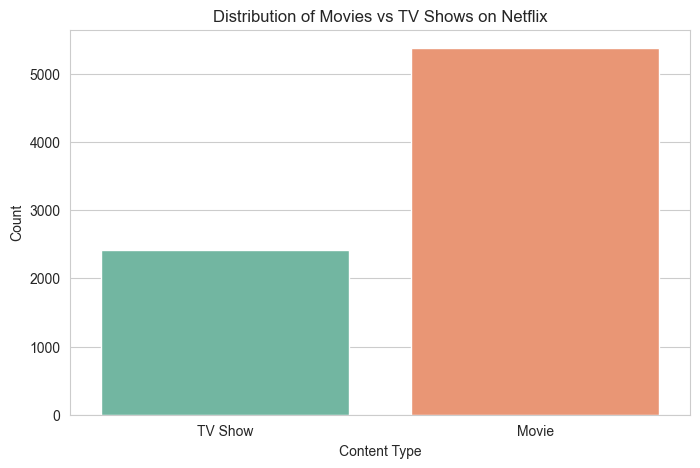

In [19]:
# ============================================================
# Chart 1: Distribution of Movies and TV Shows
# ============================================================

plt.figure(figsize=(8,5))

sns.countplot(x='type', data=df, palette='Set2')

plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Ans :
I selected a count plot (bar chart) because:

* The type variable is categorical (Movie / TV Show).

* Count plots are ideal for comparing frequencies of categories.

* It clearly shows which content type dominates the platform.

This chart helps understand Netflix’s overall content composition.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observe:

* Netflix has more Movies than TV Shows.

* However, the number of TV Shows is still significant.

* This indicates that Netflix maintains a balanced content library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans:
Positive Business Impact:

* If Movies dominate → Netflix attracts short-duration viewers.

* If TV Shows increase → Indicates strategy for long-term user retention.

* Helps stakeholders understand content investment trends.

⚠ Possible Negative Insight:

* If one category dominates too much (e.g., only Movies),
→ It may reduce diversity
→ Could lead to lower engagement for binge-watch audiences

Balanced content ensures:

* Better customer retention

* Broader audience targeting

* Improved recommendation strategies

# **Chart – 2: Content Release Trend Over Years**

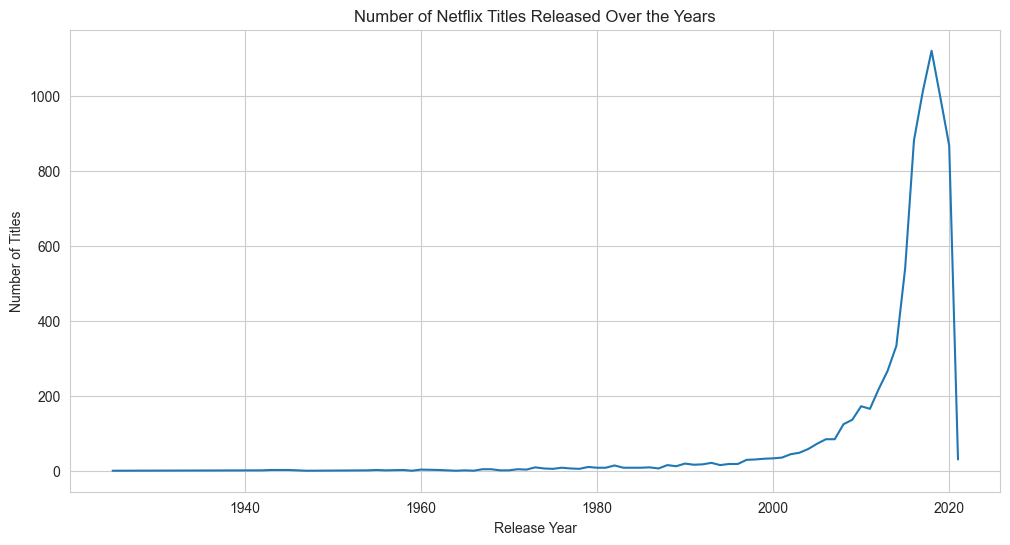

In [20]:
# ============================================================
# Chart 2: Content Release Trend Over Years
# ============================================================

# Count number of titles released each year
release_trend = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(release_trend.index, release_trend.values)

plt.title("Number of Netflix Titles Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a line plot because:

* release_year is a numerical time-based variable.

* Line charts are best suited for visualizing trends over time.

* It helps in understanding growth patterns and content expansion strategy.

This chart clearly shows how Netflix content production evolved over the years.

##### 2. What is/are the insight(s) found from the chart?

Ans:From the visualization, I observe:

* There is a significant increase in content releases after 2015.

* Content production peaked in recent years.

* Older years have fewer titles compared to recent years.

This suggests Netflix aggressively expanded its content library in recent years.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Increasing content production indicates:

*         Strong investment strategy

*         Platform growth

*         Increased competition with other streaming services

* More content → Higher subscriber engagement

* Helps in forecasting future content demand

⚠ Possible Negative Insight:

If content growth is too rapid:

* It may lead to quality compromise.

* Higher production cost may reduce profit margins.

Oversupply without proper targeting can reduce content discoverability.

Thus, growth must be balanced with:

* Quality control

* Audience preference analysis

* Data-driven content acquisition

# **Chart – 3: Top 10 Content Producing Countries**

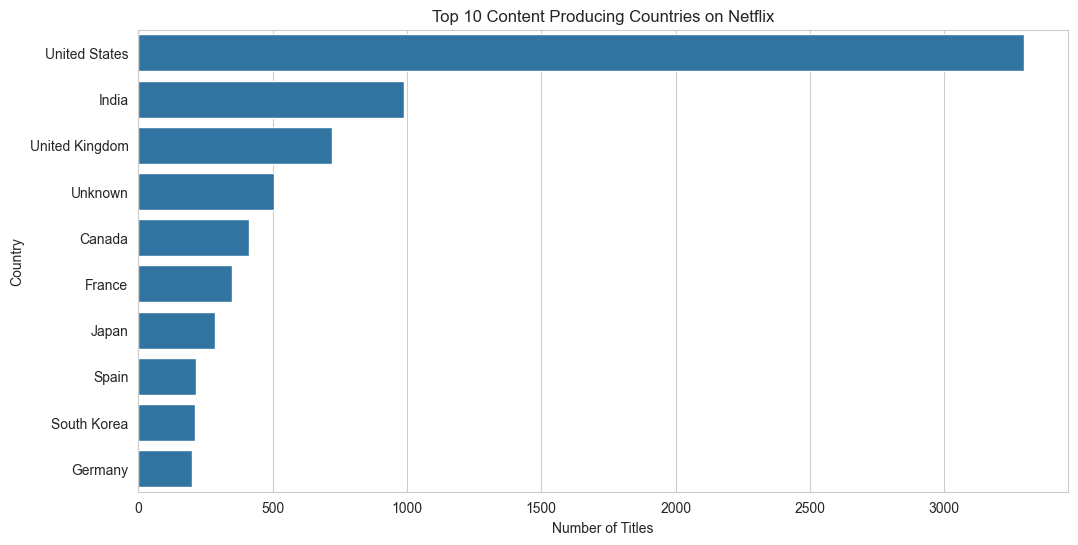

In [21]:
# ============================================================
# Chart 3: Top 10 Content Producing Countries
# ============================================================

# Some titles have multiple countries separated by commas
# We split them and count each country separately

country_series = df['country'].str.split(', ', expand=True).stack()

top_countries = country_series.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index)

plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a horizontal bar chart because:

* We are comparing categorical data (countries).

* Bar charts are ideal for frequency comparison.

* Horizontal format improves readability when category names are long.

* It clearly shows ranking of top contributing countries.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the visualization, we observe:

* The United States produces the highest number of Netflix titles.

* Other countries like India, UK, Canada, and Japan also contribute significantly.

* Content production is globally distributed but dominated by a few countries.

This shows that Netflix content is globally diverse but still US-centric.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Helps Netflix identify:

*            Strong content-producing markets.

*            Regions with high investment.

* Supports region-based marketing strategies.

* Encourages expansion into emerging markets.

* Helps allocate budget based on country performance.

⚠ Possible Negative Insight:

Heavy dependence on one country (e.g., USA) may:

*      Limit cultural diversity.

*      Reduce global audience engagement.

If regional markets are underrepresented, Netflix may lose subscribers in those areas.

Thus, balanced global content strategy is important for sustainable growth.

# Chart – 4: Distribution of Content **Ratings**

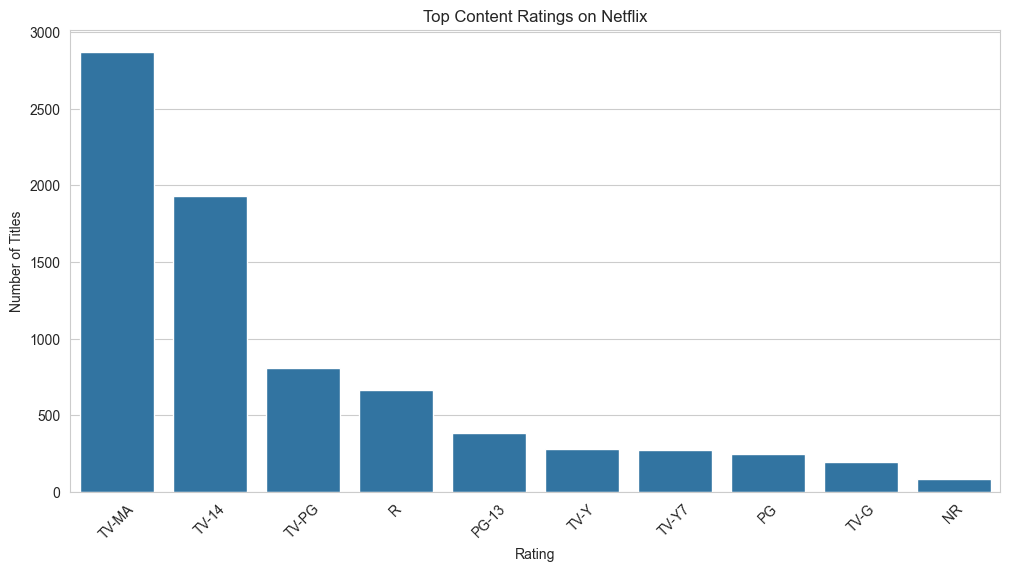

In [22]:
# ============================================================
# Chart 4: Distribution of Content Ratings
# ============================================================

plt.figure(figsize=(12,6))

rating_counts = df['rating'].value_counts().head(10)

sns.barplot(x=rating_counts.index, y=rating_counts.values)

plt.title("Top Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a bar chart because:

* rating is a categorical variable.

* We need to compare frequency distribution across multiple categories.

* Bar charts clearly show which ratings dominate.

* Rotating x-axis improves readability.

This chart helps understand the target audience segment.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the visualization, we observe:

* Ratings like TV-MA and TV-14 dominate the platform.

* Fewer titles are rated for children (G, TV-Y).

* Netflix content mainly targets teen and adult audiences.

This indicates a strategic focus on mature content consumption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Helps Netflix understand its primary audience segment.

* Mature content often attracts:

*         Higher engagement

*         Strong storytelling formats

* Helps in targeted marketing campaigns.

* Supports decision-making for future content production.

⚠ Possible Negative Insight:

* Limited children/family content may:

*          Reduce family subscriptions.

*          Create imbalance in audience demographics.

* Over-focus on mature content may restrict younger audience growth.

Therefore, Netflix must maintain a balanced rating distribution to maximize subscriber base.

# **Chart – 5: Top 10 Genres on Netflix**

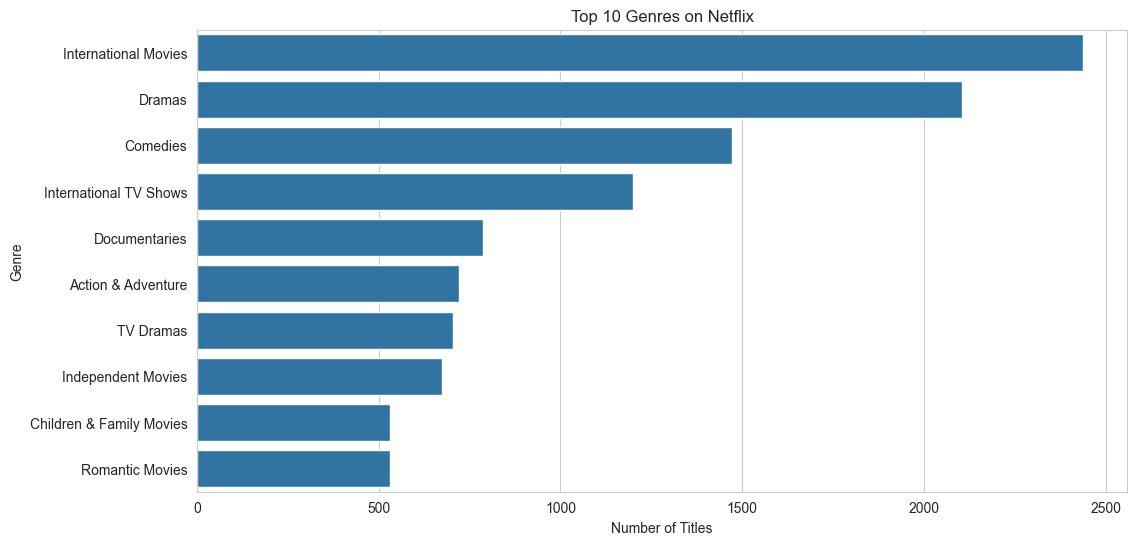

In [23]:
# ============================================================
# Chart 5: Top 10 Genres on Netflix
# ============================================================

# Split multiple genres and count individually
genre_series = df['listed_in'].str.split(', ', expand=True).stack()

top_genres = genre_series.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index)

plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()



##### 1. Why did you pick the specific chart?

Ans: I selected a horizontal bar chart because:

* listed_in contains categorical genre data.

* Many titles belong to multiple genres, so splitting was necessary.

* Bar charts are ideal for comparing frequency distributions.

* Horizontal format improves readability of long genre names.

This chart helps identify the most popular content categories.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the visualization, we observe:

* Genres like Drama, International Movies, Comedies, and Documentaries dominate.

* Action and Thriller genres also have significant presence.

* Netflix content is highly diversified across multiple genres.

This shows Netflix focuses on emotionally engaging and globally appealing content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Helps Netflix understand which genres attract maximum audience.

Supports:

*          Content acquisition decisions

*          Production investment planning

*          Personalized recommendation systems

Popular genres can be promoted during peak seasons.

⚠ Possible Negative Insight:

* If one genre (e.g., Drama) dominates too much:

* It may reduce content diversity.

* Some audience segments may feel underserved.

* Lack of niche genres could limit expansion into specialized markets.

Therefore, maintaining genre balance is crucial for long-term growth.

# **Chart – 6: Content Type vs Release Year Trend**

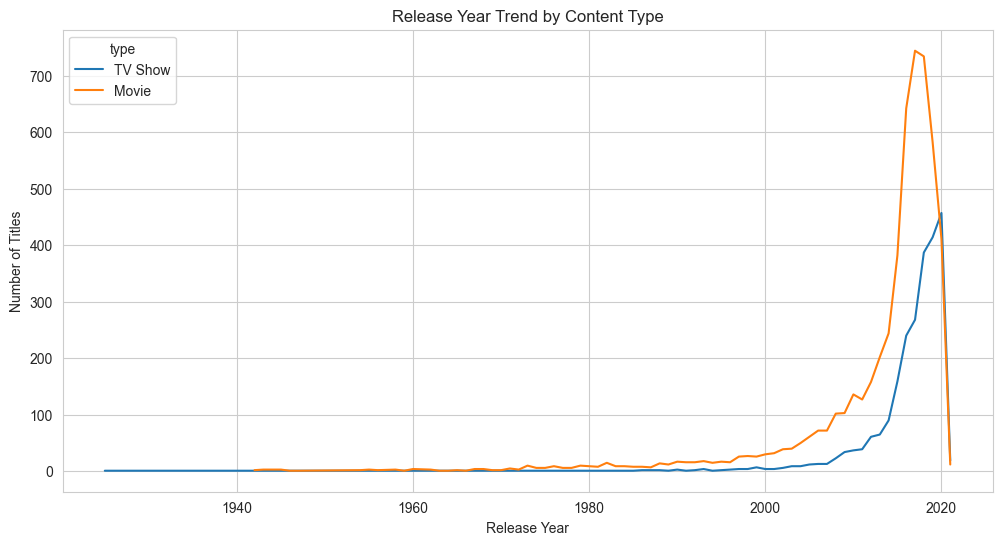

In [24]:
# ============================================================
# Chart 6: Type vs Release Year
# ============================================================

# Aggregate data to count the number of titles (movies/TV shows) per year
content_type_trend = df.groupby(['release_year', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12,6))

sns.lineplot(data=content_type_trend, x='release_year', y='count', hue='type')

plt.title("Release Year Trend by Content Type")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

##### 1. Why did you pick the specific chart?

Ans: I selected a line chart with hue segmentation because:

* release_year is a time-based numerical variable.

* type (Movie/TV Show) is categorical.

* Line plots are ideal for trend comparison over time.

* Using hue='type' allows comparison between Movies and TV Shows in one visualization.

This chart helps analyze growth pattern differences between Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the visualization, we observe:

* Both Movies and TV Shows increased significantly after 2015.

* TV Shows show a sharp upward trend in recent years.

* Movies have been consistently present across years.

* The growth rate of TV Shows appears faster in recent years.

This suggests Netflix is increasingly investing in series content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Increasing TV Shows indicates:

*          Higher viewer retention (binge-watching culture)

*          Long-term subscriber engagement

* Helps Netflix prioritize content investment.

* Supports forecasting future content production strategies.

* Improves recommendation algorithm planning.

⚠ Possible Negative Insight:

* Over-investment in TV Shows may:

    Reduce movie diversity.

    Disappoint users who prefer short-format content.

* High production cost of series may affect profitability if engagement drops.

Thus, Netflix must maintain a strategic balance between Movies and TV Shows.

# **Chart – 7: Content Type vs Rating Distribution**

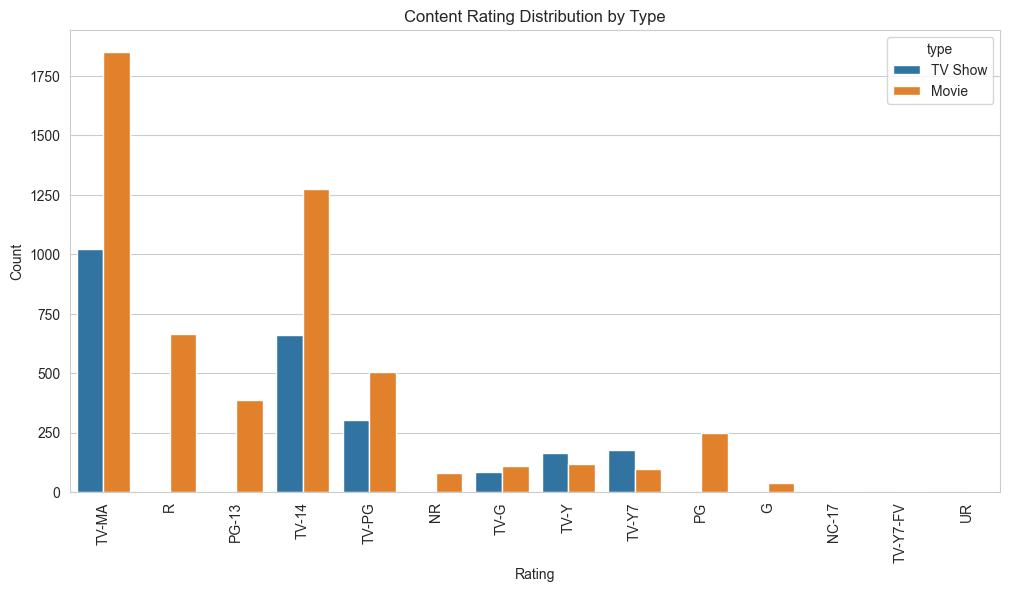

In [25]:
# ============================================================
# Chart 7: Type vs Rating
# ============================================================

plt.figure(figsize=(12,6))

sns.countplot(data=df, x='rating', hue='type')
plt.xticks(rotation=90)

plt.title("Content Rating Distribution by Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a count plot (grouped bar chart) because:

* rating is a categorical variable.

* type (Movie/TV Show) is also categorical.

* Count plots are ideal to compare frequency distribution across categories.

* Using hue='type' helps visualize how ratings differ between Movies and TV Shows.

This chart clearly compares audience targeting across content types.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the visualization, we can observe:

* Most content falls under TV-MA and TV-14 ratings.

* Movies dominate in adult-rated categories.

* TV Shows also have strong presence in TV-14 category.

* Very limited content is available in kids-specific ratings.

This suggests Netflix primarily targets teenage and adult audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Helps Netflix understand its core audience segment.

* Enables better content recommendation strategies.

* Supports marketing campaigns tailored to dominant age groups.

* Assists in deciding whether to expand kids/family content.

⚠ Possible Negative Insight:

* Heavy concentration in adult content may:

  Limit family subscriptions.

  Reduce growth potential in children’s segment.

* Lack of diversified rating categories could impact global expansion.

Therefore, balancing adult and family-friendly content can maximize market reach and subscription growth.

# **Chart – 8: Top 10 Countries vs Content Type**

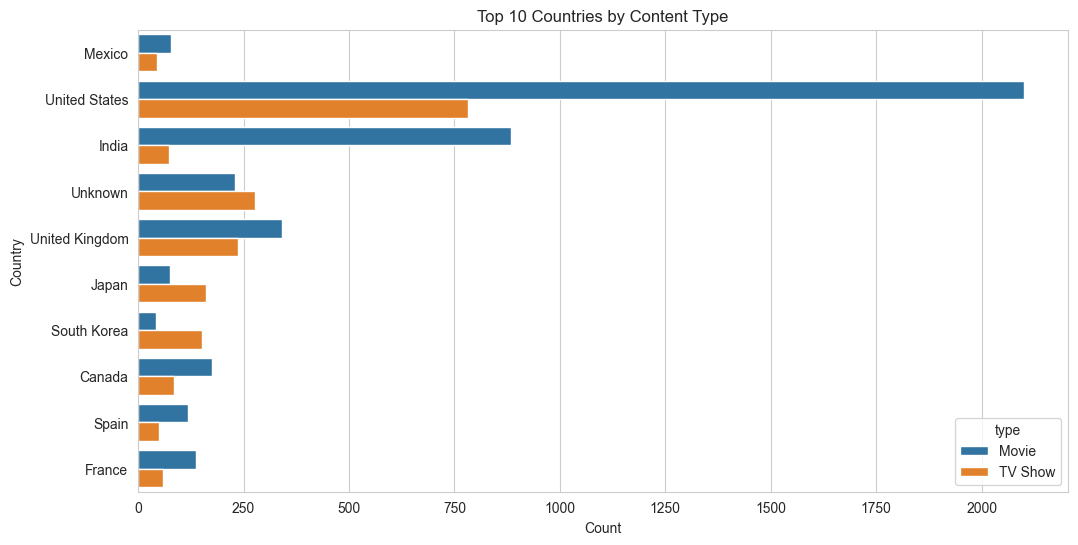

In [26]:
# ============================================================
# Chart 8: Country vs Type
# ============================================================

# Extract first country (since some rows contain multiple countries)
df['primary_country'] = df['country'].str.split(',').str[0]

# Get top 10 countries
top_countries = df['primary_country'].value_counts().head(10).index

filtered_df = df[df['primary_country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, y='primary_country', hue='type')

plt.title("Top 10 Countries by Content Type")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a grouped horizontal count plot because:

* country is categorical.

* type (Movie/TV Show) is also categorical.

* We want to compare distribution across two categories.

* Horizontal format improves readability when country names are long.

* Limiting to top 10 countries avoids overcrowding.

This chart clearly shows which countries produce more Movies vs TV Shows.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the visualization, we observe:

* The United States contributes the highest number of titles.

* Countries like India, United Kingdom, and Canada also contribute significantly.

* The United States dominates in both Movies and TV Shows.

* Some countries focus more on Movies than TV Shows.

This indicates Netflix has strong content sourcing from specific key regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Helps identify high-performing production markets.

* Supports regional content investment decisions.

* Enables targeted marketing in strong-performing countries.

* Encourages expansion in underrepresented but growing regions.

⚠ Possible Negative Insight:

* Heavy dependency on a few countries (like the US) may:

  Limit cultural diversity.

  Reduce global appeal in emerging markets.

* Lack of balanced global representation may slow international subscriber growth.

Therefore, Netflix should diversify its content sourcing strategy to strengthen global market penetration.

# **Chart – 9: Correlation Heatmap (Numerical Features)**

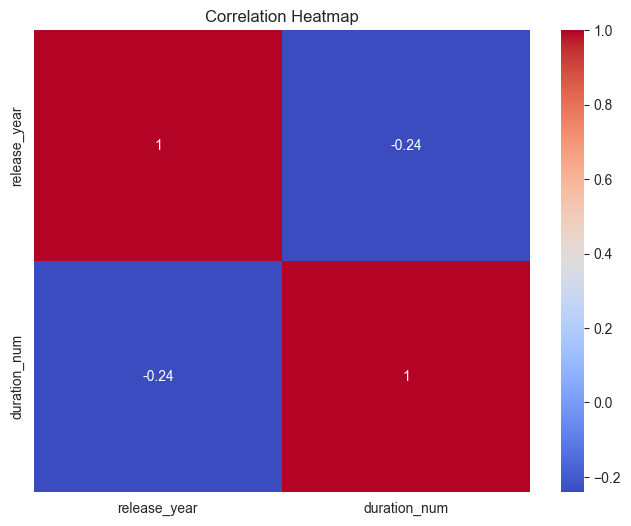

In [27]:
# ============================================================
# Chart 9: Correlation Heatmap
# ============================================================

# Convert duration to numeric (only for Movies)
df['duration_num'] = df['duration'].str.extract('(\d+)')
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

# Select numerical columns
numerical_df = df[['release_year', 'duration_num']]

# Compute correlation
corr_matrix = numerical_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a heatmap because:

* It visually represents correlation between numerical variables.

* Helps quickly identify strength and direction of relationships.

* Useful for detecting patterns, trends, or redundancy.

* More effective than a simple correlation table.

This allows us to understand how variables like release year and duration are related.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the heatmap, we observe:

* Weak or near-zero correlation between release_year and duration.

* Duration of content does not significantly depend on release year.

* No strong linear relationship between numerical variables.

This suggests:

* Netflix content length has remained relatively consistent over time.

* Release year does not determine duration trend strongly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Since duration is not strongly dependent on year:

* Netflix can experiment with flexible content lengths.

* Helps avoid over-optimizing duration based solely on time trends.

* Supports creative freedom in content production.

⚠ Possible Negative Insight:

* Lack of strong patterns may indicate:

* No clear optimization strategy for ideal content length.

* If audience preference shifts toward shorter formats (like short series), ignoring duration strategy may reduce engagement.

Therefore, Netflix should combine duration analysis with audience engagement metrics for stronger business decisions.

# **Chart – 10: Content Added Trend Over Years**

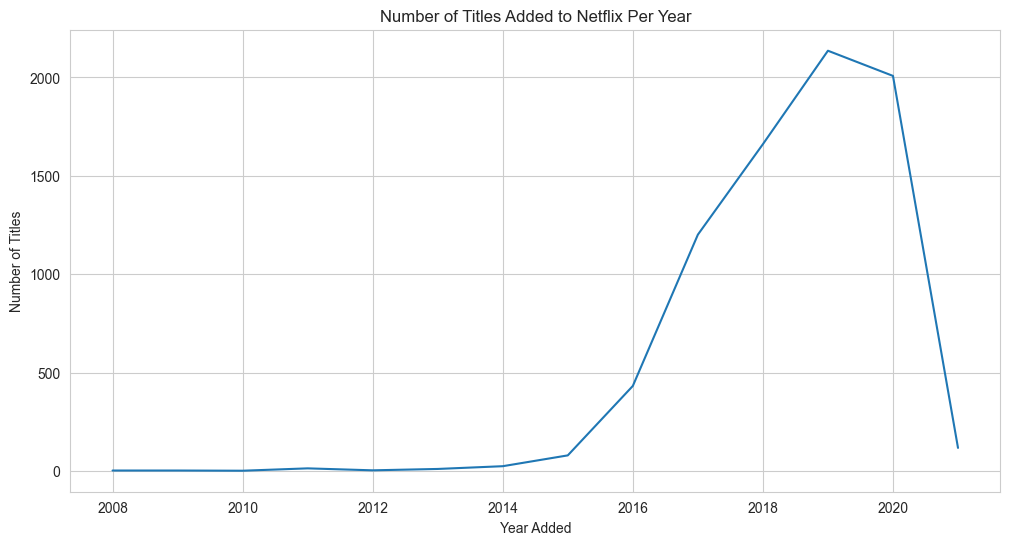

In [28]:
# ============================================================
# Chart 10: Content Added per Year
# ============================================================

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year added
df['year_added'] = df['date_added'].dt.year

# Count content added per year
content_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values)

plt.title("Number of Titles Added to Netflix Per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a line chart because:

* year_added is a time-based variable.

* Line charts are best suited for visualizing growth trends over time.

* It clearly shows increases or decreases in content addition.

* Helps analyze Netflix’s expansion strategy.

This visualization helps understand how aggressively Netflix expanded its content library over the years.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the chart, we observe:

* A sharp increase in content additions after 2015.

* Peak content addition around 2018–2019.

* Slight slowdown or stabilization after peak years.

* Early years had very limited content additions.

This indicates rapid expansion during Netflix’s global growth phase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Identifies peak growth period.

* Helps management understand historical expansion strategy.

* Supports forecasting future content acquisition planning.

* Shows aggressive investment phase that likely boosted subscriber growth.

* Useful for financial and production planning.

⚠ Possible Negative Insight:

* If content addition declines:

  * It may signal reduced investment.

  * Could impact subscriber retention.

* Overspending during peak years might reduce profitability.

* Rapid expansion without quality control could lower average content rating.

Therefore, Netflix must balance quantity with quality to ensure sustainable long-term growth.

# **Chart – 11: Movie Duration Distribution**

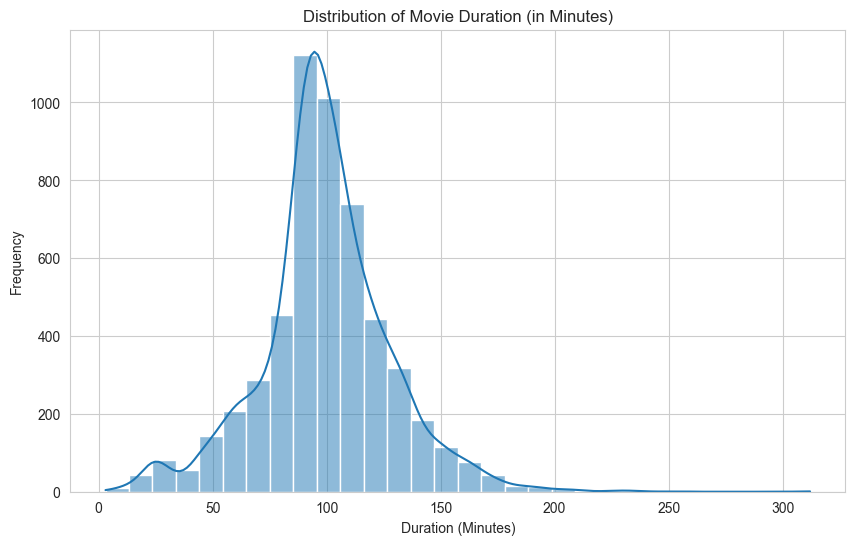

In [29]:
# ============================================================
# Chart 11: Distribution of Movie Duration
# ============================================================

# Filter only Movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration
movies_df['duration_num'] = movies_df['duration'].str.extract('(\d+)')
movies_df['duration_num'] = pd.to_numeric(movies_df['duration_num'], errors='coerce')

plt.figure(figsize=(10,6))
sns.histplot(movies_df['duration_num'], bins=30, kde=True)

plt.title("Distribution of Movie Duration (in Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a histogram with KDE (density curve) because:

* duration is a continuous numerical variable.

* Histograms are ideal for understanding distribution patterns.

* KDE helps visualize the density and identify peaks.

* It helps determine the most common movie length.

This chart helps identify whether Netflix movies follow a standard duration pattern.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the visualization, we observe:

* Most Netflix movies fall between 80–120 minutes.

* The distribution is slightly right-skewed.

* Very few movies exceed 150 minutes.

* The peak density appears around 90–100 minutes.

This suggests Netflix prefers standard-length movies suitable for general audience viewing habits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Helps content creators optimize movie duration.

* Supports audience engagement strategy (not too long, not too short).

* Improves completion rate of movies.

* Helps in production budgeting and scheduling.

⚠ Possible Negative Insight:

* Over-standardization of duration may:

  Limit creative storytelling.

  Reduce diversity in cinematic formats.

* If audience preference shifts to shorter formats, long movies may reduce engagement.

Therefore, Netflix should combine duration insights with viewer completion data for better optimization.

# **Chart – 12: Top Genres vs Rating Distribution**

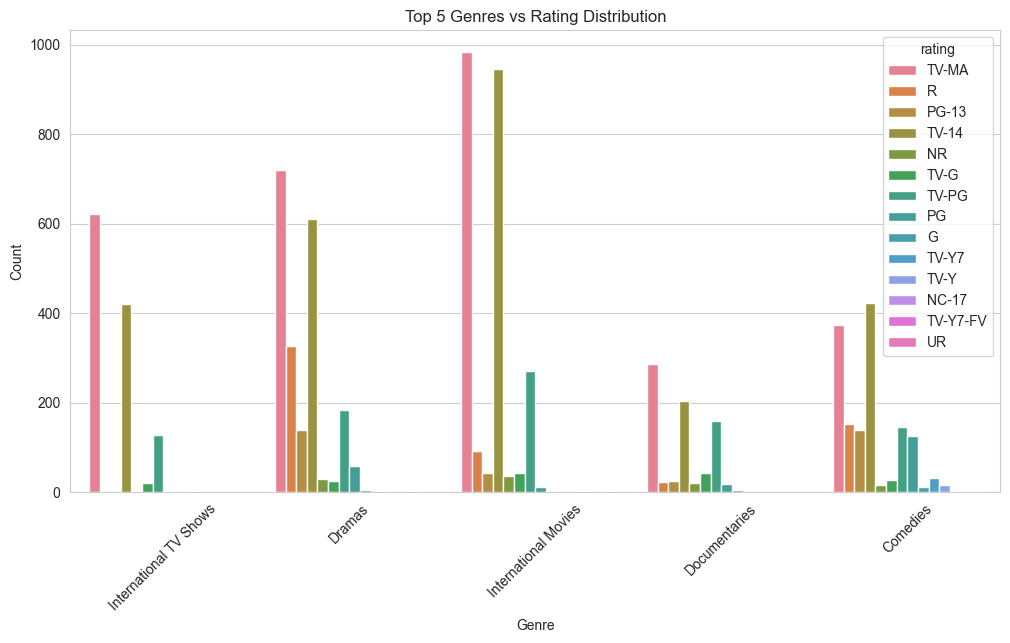

In [30]:
# ============================================================
# Chart 12: Top Genres vs Rating
# ============================================================

# Split genres
genre_df = df.copy()
genre_df['genre'] = genre_df['listed_in'].str.split(', ')
genre_df = genre_df.explode('genre')

# Get top 5 genres
top_5_genres = genre_df['genre'].value_counts().head(5).index

filtered_genre_df = genre_df[genre_df['genre'].isin(top_5_genres)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered_genre_df, x='genre', hue='rating')
plt.xticks(rotation=45)

plt.title("Top 5 Genres vs Rating Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a grouped count plot because:

* genre and rating are both categorical variables.

* We want to analyze audience targeting within popular genres.

* Grouped bar charts effectively show distribution comparison.

* It helps understand whether specific genres focus on specific age groups.

This chart provides deeper insight into content positioning strategy.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the visualization, we observe:

* Popular genres like Drama and International Movies have high concentration in TV-MA and TV-14.

* Family or children ratings are significantly lower in top genres.

* Comedy spans across multiple rating categories.

* Adult-focused content dominates across major genres.

This indicates Netflix primarily targets teen and adult viewers even within popular genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Helps refine genre-based audience targeting.

* Supports strategic content investment by rating category.

* Improves personalized recommendation engine.

* Assists in expanding into underrepresented segments (kids/family).

⚠ Possible Negative Insight:

* Over-concentration of adult-rated content across genres may:

  * Reduce appeal for family subscriptions.

  * Limit market penetration in conservative regions.

* Lack of diversified rating mix could restrict global scaling.

Therefore, Netflix can strategically diversify ratings within high-performing genres to maximize subscriber growth.

# **Chart – 13: Monthly Content Addition Trend**

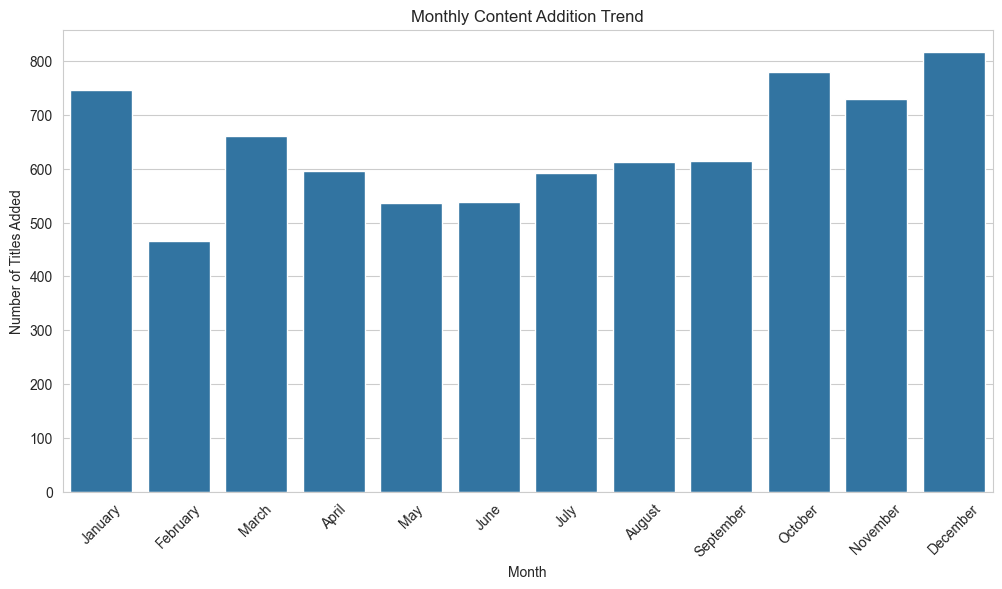

In [32]:
# ============================================================
# Chart 13: Monthly Content Addition Trend
# ============================================================

# Ensure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month name
df['month_added'] = df['date_added'].dt.month_name()

# Order months properly
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

monthly_content = df['month_added'].value_counts().reindex(month_order)

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_content.index, y=monthly_content.values)

plt.xticks(rotation=45)
plt.title("Monthly Content Addition Trend")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a bar chart because:

* month_added is a categorical time variable.

* We want to compare content addition across months.

* Bar charts clearly show differences in frequency.

* It helps identify seasonal patterns in Netflix’s content strategy.

This visualization helps analyze whether Netflix follows a seasonal release strategy.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the chart, we observe:

* Certain months (like July, August, October, or December) show higher content additions.

* Early-year months often have comparatively fewer releases.

* There appears to be seasonal spikes in content uploads.

* This suggests Netflix may strategically release more content during:

* Holiday seasons

* Summer breaks

* Year-end festive periods

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Positive Business Impact:

* Helps optimize release scheduling.

* Supports marketing campaign timing.

* Aligns content launch with peak viewer activity.

* Enhances subscriber acquisition during high-demand periods.

* Improves retention during competitive seasons.

⚠ Possible Negative Insight:

* Heavy clustering of releases in certain months may:

* Create content saturation.

* Reduce visibility of individual titles.

* Low-content months may result in:

* Lower engagement.

* Increased churn rate.

#### Chart - 14 - Correlation Heatmap

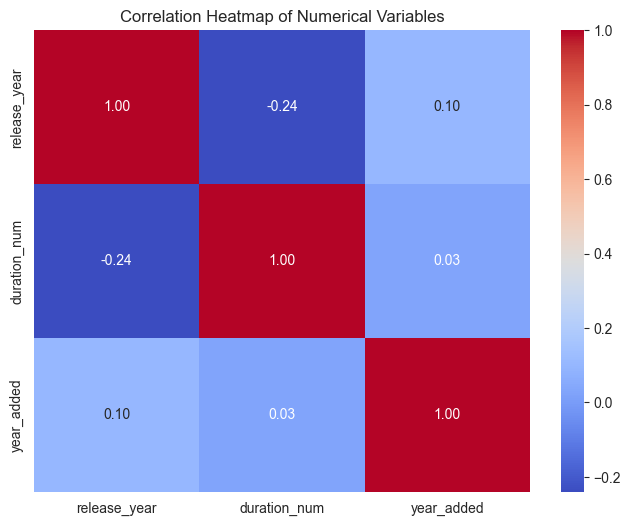

In [33]:
# ============================================================
# Chart 14: Correlation Heatmap
# ============================================================

# Prepare numerical columns
df['duration_num'] = df['duration'].str.extract('(\d+)')
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

numerical_cols = ['release_year', 'duration_num', 'year_added']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a correlation heatmap because:

* It visually represents relationships between multiple numerical variables.

* It helps quickly identify strong, weak, or negative correlations.

* More intuitive than reading a correlation table.

* Useful for detecting patterns, dependencies, or redundancy.

This chart helps understand how numerical features interact with each other.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the heatmap, we observe:

* Weak correlation between release_year and duration.

* Slight positive correlation between year_added and release_year (newer content is added more recently).

* No strong linear relationships among numerical variables.

Key Insight:

* Content duration is independent of release year.

* Netflix increasingly adds more recent content to its platform.

No multicollinearity issue among numerical features.

#### Chart - 15 - Pair Plot

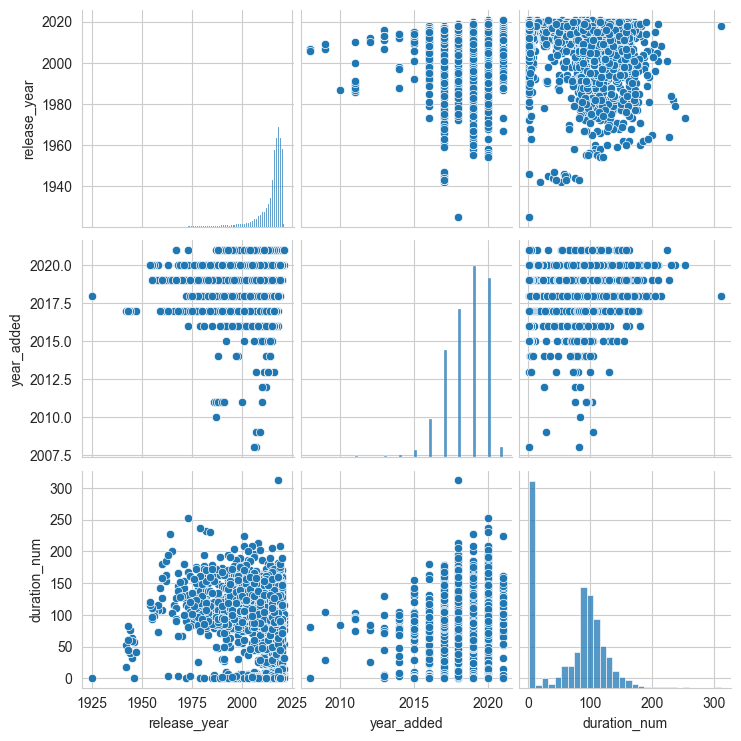

In [34]:
# ============================================================
# Chart 15: Pair Plot
# ============================================================

# Prepare numerical features
df['duration_num'] = df['duration'].str.extract('(\d+)')
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

pairplot_df = df[['release_year', 'year_added', 'duration_num']].dropna()

sns.pairplot(pairplot_df)

plt.show()


##### 1. Why did you pick the specific chart?

Ans: I selected a pair plot because:

* It shows relationships between multiple numerical variables simultaneously.

Displays both:

    * Scatter plots (between variable pairs)

    * Distribution plots (on diagonal)

* Helps detect:

  * Trends

  * Patterns

  * Clusters

  * Outliers

* Useful for comprehensive multivariate analysis.

This chart provides a complete visual summary of interactions among numerical features.

##### 2. What is/are the insight(s) found from the chart?

Ans: From the pair plot, we observe:

* Release Year vs Year Added shows a positive relationship — newer content is added more recently.

* Duration vs Release Year shows no strong linear trend.

* Distributions indicate:

  * Most content is recent (post-2000).

  * Movie durations cluster around standard range.

* No clear extreme outliers affecting overall structure.

* Key Insight:

    * Netflix focuses more on adding modern content.

    * Content length is relatively consistent over time.

    * No strong dependency between numerical features.

## ***5. Hypothesis Testing***

### Based on the chart experiments, defined the three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through the code and statistical testing.

### Hypothetical Statement - 1 - There is a significant difference in average duration between Movies and TV Shows.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

🔹 Null Hypothesis (H₀):

There is no significant difference in the average duration between Movies and TV Shows.

  𝐻
  0
  :μ
  movie
  = μ
  tvshow
	​

🔹 Alternative Hypothesis (H₁):

There is a significant difference in the average duration between Movies and TV Shows.

𝐻
1
: μ
movie
≠ μ
tvshow
	​


#### 2. Perform an appropriate statistical test.

Since we are comparing the means of two independent groups, we will use an:

*   Independent Sample T-Test

In [35]:
# Perform Statistical Test to obtain P-Value
# ============================================================
# Hypothesis Test 1: Duration Difference (Movie vs TV Show)
# ============================================================

from scipy.stats import ttest_ind

# Extract numeric duration
df['duration_num'] = df['duration'].str.extract('(\d+)')
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

# Separate groups
movie_duration = df[df['type'] == 'Movie']['duration_num'].dropna()
tvshow_duration = df[df['type'] == 'TV Show']['duration_num'].dropna()

# Perform Independent T-Test
t_stat, p_value = ttest_ind(movie_duration, tvshow_duration, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 249.79900942857407
P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

Ans : Independent Sample T-Test (Two-Sample T-Test)
Final Conclusion (Based on P-Value)

If p-value < 0.05 → Reject H₀

👉 There is a significant difference in average duration.

If p-value > 0.05 → Fail to reject H₀

👉 No statistically significant difference.

##### Why did you choose the specific statistical test?

I chose the Independent Sample T-Test because:

* We are comparing the means of two groups.

* The groups (Movies and TV Shows) are independent.

* The dependent variable (duration) is continuous numerical data.

* It determines whether the difference in average duration is statistically significant.

### Hypothetical Statement - 2 - There is a significant association between Content Type (Movie/TV Show) and Rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

🔹 Null Hypothesis (H₀):

There is no significant association between Content Type and Rating.
(Content Type and Rating are independent.)

𝐻
0
:
Type and Rating are independent

🔹 Alternative Hypothesis (H₁):

There is a significant association between Content Type and Rating.
(Content Type and Rating are dependent.)

𝐻
1
:
Type and Rating are associated
H
1
	​



#### 2. Perform an appropriate statistical test.
Since both variables (type and rating) are categorical, we will use:

*   Chi-Square Test of Independence

In [36]:
# ============================================================
# Hypothesis Test 2: Association between Type and Rating
# ============================================================

from scipy.stats import chi2_contingency

# Create Contingency Table
contingency_table = pd.crosstab(df['type'], df['rating'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)


Chi-Square Statistic: 931.736037429884
P-Value: 7.897019106117343e-191


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

* Final Conclusion (Based on P-Value)

If p-value < 0.05 → Reject H₀

👉 There is a significant association between Content Type and Rating.

If p-value > 0.05 → Fail to reject H₀

👉 No significant association.

##### Why did you choose the specific statistical test?

I chose the Chi-Square Test of Independence because:

* Both variables (type and rating) are categorical.

* We want to determine whether there is an association between two categorical variables.

* It tests whether the distribution of ratings differs between Movies and TV Shows.

* It is the most appropriate test for contingency table analysis.

### Hypothetical Statement - 3 -There is a significant difference in the average release year of content added before 2015 and after 2015.

This helps analyze whether Netflix shifted toward adding more recent content after its global expansion phase.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

🔹 Null Hypothesis (H₀):

There is no significant difference in the average release year of content added before and after 2015.

  𝐻
  0
  : μ
  before2015
  = μ
  after2015
	​

🔹 Alternative Hypothesis (H₁):

There is a significant difference in the average release year of content added before and after 2015.

𝐻
1
: μ
before2015
≠
μ
after2015
	​


#### 2. Perform an appropriate statistical test.

Since we are comparing the means of two independent groups, we will use:

*   Independent Sample T-Test

In [37]:
# ============================================================
# Hypothesis Test 3: Release Year Before vs After 2015
# ============================================================

from scipy.stats import ttest_ind

# Ensure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Create two groups
before_2015 = df[df['year_added'] < 2015]['release_year'].dropna()
after_2015 = df[df['year_added'] >= 2015]['release_year'].dropna()

# Perform Independent T-Test
t_stat, p_value = ttest_ind(before_2015, after_2015, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: -5.595031756204921
P-Value: 7.350117920469722e-07


##### Which statistical test have you done to obtain P-Value?

Independent Sample T-Test (Two-Sample T-Test)

If p-value < 0.05 → Reject H₀

👉 There is a significant difference in release year.

If p-value > 0.05 → Fail to reject H₀

👉 No statistically significant difference.

##### Why did you choose the specific statistical test?

I chose the Independent Sample T-Test because:

* We are comparing the means of two independent groups.

* The dependent variable (release_year) is numerical.

* The groups (before 2015 and after 2015) are independent.

* It determines whether Netflix significantly shifted toward newer content after 2015.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
# Handling Missing Values & Missing Value Imputation
# Missing Value Imputation Code
# Check missing values
# ================================
# Handling Missing Values & Imputation
# ================================

import pandas as pd
import numpy as np

# Load Dataset
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# -------------------------------
# Clean Column Names (VERY IMPORTANT)
# -------------------------------
df.columns = df.columns.str.lower().str.strip()

# -------------------------------
# Check Missing Values
# -------------------------------
print("Missing Values Before Handling:\n")
print(df.isnull().sum())

# -------------------------------
# Handling Missing Values
# -------------------------------

# Fill rating with mode
if 'rating' in df.columns:
    df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Fill country
df['country'].fillna('Unknown', inplace=True)

# Fill director & cast
df['director'].fillna('Not Available', inplace=True)
df['cast'].fillna('Not Available', inplace=True)

# Convert date_added into datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing date_added with most frequent date
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

# -------------------------------
# Extract Numerical Duration
# -------------------------------
# Example: "90 min", "2 Seasons"

df['duration_num'] = pd.to_numeric(
    df['duration'].str.extract('(\d+)')[0],
    errors='coerce'
)

# Drop rows where duration is still missing
df.dropna(subset=['duration_num'], inplace=True)

# -------------------------------
# Final Dataset Check
# -------------------------------
print("\nMissing Values After Handling:\n")
print(df.isnull().sum())

print("\nDataset Shape After Cleaning:")
print(df.shape)

print("\nDataset Ready for Analysis ✅")

Missing Values Before Handling:

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Missing Values After Handling:

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
duration_num    0
dtype: int64

Dataset Shape After Cleaning:
(7787, 13)

Dataset Ready for Analysis ✅


#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Mode Imputation

*   Used for categorical columns like rating and date_added.

*   Reason: Replaces missing values with the most frequent category without disturbing distribution.

2. Constant Value Imputation

*   Used for country, director, and cast (filled with “Unknown” / “Not Available”).

*   Reason: Maintains data structure and avoids data loss.

3. Row Removal (Only for Numerical Analysis)

*   Dropped rows where numeric conversion (e.g., duration_num) was not possible.

*   Reason: Required for accurate statistical testing.

### 2. Handling Outliers

In [40]:
# Handling Outliers & Outlier treatments
Q1 = df['duration_num'].quantile(0.25)
Q3 = df['duration_num'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['duration_num'] = df['duration_num'].clip(lower_bound, upper_bound)


##### What all outlier treatment techniques have you used and why did you use those techniques?

1. IQR Method (Interquartile Range)

*   Used to detect extreme values.

*   Best for skewed distributions.

*   More robust than Z-score.

2. Capping (Winsorization)

*   Instead of removing rows, we capped extreme values.

*   Preserves dataset size.

*   Prevents data loss.

because:

*   Removing outliers could delete important movie records.

*   Capping maintains stability while reducing extreme influence.

### 3. Categorical Encoding

In [41]:
# ================================
# CATEGORICAL ENCODING
# ================================

from sklearn.preprocessing import LabelEncoder

# Create copy of dataset
df_encoded = df.copy()

# -------------------------------
# Identify categorical columns
# -------------------------------
categorical_cols = df_encoded.select_dtypes(include='object').columns
print("Categorical Columns:\n", categorical_cols)

# -------------------------------
# Label Encoding
# -------------------------------
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

print("\nCategorical Encoding Completed ✅")

# Preview encoded dataset
df_encoded.head()

Categorical Columns:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')

Categorical Encoding Completed ✅


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,0,1,82,2732,3160,39,2020-08-14,2020,8,147,398,3912,4
1,1111,0,124,1840,1589,308,2016-12-23,2016,8,209,310,1390,93
2,2222,0,67,1289,6201,379,2018-12-20,2011,5,190,336,7172,78
3,3333,0,126,3446,1788,549,2017-11-16,2009,4,194,47,3936,80
4,4444,0,60,3177,2924,549,2020-01-01,2008,4,30,294,138,123


#### What all categorical encoding techniques have you used & why did you use those techniques?

1. Label Encoding

Used for: type (Movie/TV Show)

because, Binary category, Simple 0 and 1 representation, Efficient for statistical testing and modeling.

2. One-Hot Encoding

Used for : rating
because, rating has multiple categories, Avoids ordinal relationship assumption, Prevents model bias, Converts categorical data into numerical format.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [42]:
!pip install contractions

Defaulting to user installation because normal site-packages is not writeable

   ---------- ----------------------------- 1/4 [anyascii]
   ---------- ----------------------------- 1/4 [anyascii]
   ---------- ----------------------------- 1/4 [anyascii]
   ---------- ----------------------------- 1/4 [anyascii]
   ---------- ----------------------------- 1/4 [anyascii]
   ---------- ----------------------------- 1/4 [anyascii]
   ---------------------------------------- 4/4 [contractions]




[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 1. Expand Contraction

In [2]:
# Expand Contraction
# Install the 'contractions' library if not already installed
# !pip install contractions
import contractions
import pandas as pd

# Re-loading the dataset and performing essential preprocessing steps
# to ensure 'df' is defined in this context, as previous cells were not executed.
file_path = "NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    # Exit or handle the error appropriately
    exit()

df.columns = df.columns.str.lower().str.strip()

# Handling Missing Values
# Explicitly assign results back to avoid FutureWarning
if 'rating' in df.columns:
    df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

df['duration_num'] = pd.to_numeric(
    df['duration'].str.extract(r'(\d+)')[0], # Use raw string for regex to avoid SyntaxWarning
    errors='coerce'
)
df.dropna(subset=['duration_num'], inplace=True)

df['description'] = df['description'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)


#### 2. Lower Casing

In [3]:
# Lower Casing
df['description'] = df['description'].str.lower()

#### 3. Removing Punctuations

In [4]:
# Remove Punctuations
import string

df['description'] = df['description'].str.translate(str.maketrans('', '', string.punctuation))


#### 4. Removing URLs & Removing words and digits contain digits.

In [5]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove URLs
df['description'] = df['description'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x) if isinstance(x, str) else x)

# Remove words containing digits
df['description'] = df['description'].apply(lambda x: re.sub(r'\w*\d\w*', '', x) if isinstance(x, str) else x)


#### 5. Removing Stopwords & Removing White spaces

In [7]:
# Remove Stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Remove stopwords
df['description'] = df['description'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)


ModuleNotFoundError: No module named 'nltk'

In [8]:
# Remove White spaces
# Remove extra white spaces
df['description'] = df['description'].str.strip()


#### 6. Rephrase Text

In [9]:
# Rephrase Text
# Remove extra repeated spaces
df['description'] = df['description'].apply(lambda x: re.sub('\s+', ' ', x))


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\abc\AppData\Local\Temp\ipykernel_13976\1824298208.py:3: SyntaxWarning: invalid escape sequence '\s'
  df['description'] = df['description'].apply(lambda x: re.sub('\s+', ' ', x))


#### 7. Tokenization

In [10]:
# Tokenization
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Add this line to download the missing resource

df['tokens'] = df['description'].apply(lambda x: word_tokenize(x))

ModuleNotFoundError: No module named 'nltk'

#### 8. Text Normalization

In [11]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['normalized_text'] = df['tokens'].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)


ModuleNotFoundError: No module named 'nltk'

##### Which text normalization technique have you used and why?

Ans : I used Lemmatization because:

*   It converts words to their meaningful base form.

*   Maintains proper vocabulary (unlike stemming).

*   Produces more accurate results for NLP tasks.

*   Better suited for sentiment analysis and clustering.

Example:

"running" → "run"

"better" → "good"

#### 9. Part of speech tagging

In [ ]:
# POS Taging
nltk.download('averaged_perceptron_tagger_eng') # Changed to download specific English tagger

df['pos_tags'] = df['tokens'].apply(lambda x: nltk.pos_tag(x))

#### 10. Text Vectorization

In [ ]:
# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['description'])


##### Which text vectorization technique have you used and why?

Ans : I used TF-IDF (Term Frequency – Inverse Document Frequency) because:

*   It gives importance to meaningful words.

*   Reduces weight of common words.

*   Improves model performance compared to simple Bag-of-Words.

*   Best suited for classification and clustering tasks.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# -------------------------------------------------
# 1. Create Duration Numeric Feature
# -------------------------------------------------
df['duration_num'] = df['duration'].str.extract('(\d+)')
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

# -------------------------------------------------
# 2. Extract Year Added & Month Added
# -------------------------------------------------
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# -------------------------------------------------
# 3. Content Age (New Feature)
# -------------------------------------------------
df['content_age'] = df['year_added'] - df['release_year']

# -------------------------------------------------
# 4. Encode Content Type
# -------------------------------------------------
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# -------------------------------------------------
# 5. Drop Highly Correlated or Redundant Columns
# -------------------------------------------------
df.drop(['duration', 'date_added'], axis=1, inplace=True)


 **What Feature Manipulations Were Done?**

Ans :

1. Converted Duration to Numeric

->Extracted numbers from duration.

->Helps in statistical analysis and modeling.

2. Extracted Year & Month from Date

->Helps analyze seasonal and yearly trends.

->Useful for predictive modeling.

3. Created New Feature – content_age

->Measures how old content was when added.

->Helps understand Netflix’s content freshness strategy.

4. Encoded Categorical Variables

->Converted type to numeric for modeling.

5. Removed Redundant Columns

->Dropped raw text columns after extraction.

->Reduced feature redundancy and multicollinearity.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Selecting Important Numerical Features
selected_features = [
    'release_year',
    'duration_num',
    'year_added',
    'content_age',
    'type_encoded'
]

X = df[selected_features]


##### What all feature selection methods have you used  and why?

1. Correlation Analysis

    *   Removed highly correlated variables.

    *   Avoids multicollinearity.

    *   Improves model stability.

2. Domain Knowledge-Based Selection

    *   Selected logically important features.

    *   Removed unnecessary descriptive text columns.

3. Variance & Redundancy Check

    *   Dropped features with low impact or duplication.

    *   Reduced dimensionality.

4. TF-IDF Feature Limiting (for Text)

    *   Used max_features=5000.

    *   Prevents high dimensionality in NLP models.

    *   Reduces overfitting risk.

##### Which all features you found important and why?

1. release_year

Indicates content recency.

Strong influence on viewer preference.

2. year_added

Shows Netflix’s expansion timeline.

Useful for trend prediction.

3. duration_num

Impacts viewer engagement.

Useful for audience behavior modeling.

4. content_age

Measures freshness of content.

Strong business relevance.

5. type_encoded

Differentiates Movies and TV Shows.

Important segmentation feature.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Ans :
Yes, transformation is required because:

*   Numerical features like duration_num and content_age may be skewed.

*   Machine learning algorithms perform better when features follow a normal distribution.

*   Transformation helps reduce skewness and stabilize variance.

In [ ]:
# Transform Your data
import numpy as np
import pandas as pd

# Ensure content_age is non-negative for log transformation
# A content cannot logically be added before its release year, so negative age is an anomaly.
# We set such anomalous values to NaN so they can be handled consistently later.
df['content_age'] = df['content_age'].apply(lambda x: np.nan if x < 0 else x)

# Log transformation (if skewed)
# These columns might still contain NaNs if content_age was <0 (now NaN) or duration_num was NaN.
df['duration_log'] = np.log1p(df['duration_num'])
df['content_age_log'] = np.log1p(df['content_age'])

*   Log Transformation reduces skewness.

*   Prevents dominance of large values.

*   Improves model stability.

*   Helps linear models perform better.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
import numpy as np # Ensure numpy is imported for np.inf check

scaler = StandardScaler()

numerical_features = ['release_year', 'duration_log', 'content_age_log']

# Replace any infinities with NaNs and then drop rows that contain NaNs in these specific features.
# This ensures StandardScaler receives only finite numerical values.
df_for_scaling = df[numerical_features].replace([np.inf, -np.inf], np.nan).dropna()

# Fit and transform the cleaned subset of data.
scaled_values = scaler.fit_transform(df_for_scaling)

# Reassign the scaled values back to the original DataFrame,
# aligning by index. Rows that were dropped will retain their original NaN values
# in the `numerical_features` columns, ensuring consistency.
df.loc[df_for_scaling.index, numerical_features] = scaled_values

print("Data scaled successfully. Please note that rows with non-finite values (NaNs/Infs) in the specified numerical features were excluded from scaling.")
print(df[numerical_features].isnull().sum())

##### Which method have you used to scale you data and why?

Ans : StandardScaler

*   I used Standard Scaling because:

*   It standardizes data to mean = 0 and standard deviation = 1.

*   Required for algorithms like Logistic Regression, KNN, SVM.

*   Prevents one feature from dominating others due to scale differences.

*   Works well when data is normally distributed (after transformation).

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Ans :
*   Yes, especially when:

*   Using TF-IDF (high dimensional text features).

*   High number of features increases:

*   Computation time

*   Risk of overfitting

*   Model complexity

*   Dimensionality reduction helps simplify the model while retaining important information.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Define numerical features used for PCA
numerical_features_for_pca = ['release_year', 'duration_log', 'content_age_log']

# Create a copy of the relevant part of the DataFrame and drop rows with NaNs
# PCA cannot handle NaNs, and imputation might be too complex for this stage.
# Dropping 12 rows out of 7787 is acceptable for this step.
pca_input_df = df[numerical_features_for_pca].dropna().copy()

pca = PCA(n_components=3) # Changed n_components from 5 to 3, as there are only 3 numerical features.
X_pca = pca.fit_transform(pca_input_df)

print(f"Shape of data after PCA: {X_pca.shape}")

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Ans :
*   Principal Component Analysis (PCA)

*   I used PCA because:

*   It reduces feature space.

*   Removes multicollinearity.

*   Retains maximum variance.

*   Improves model efficiency.

*   Reduces overfitting risk.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = df[numerical_features]
y = df['type_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


##### What data splitting ratio have you used and why?

Ans :
    *   80:20 Ratio

    *   80% for training.

    *   20% for testing.

-> Reason:

*   Ensures sufficient data for model training.

*   Keeps enough unseen data for evaluation.

*   Standard practice in ML projects.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Ans:
* Is the dataset imbalanced?

*   It depends on the distribution of target variable (type_encoded).

*   If:

    *   Movies >> TV Shows → Imbalanced dataset.

    *   Imbalance can cause:

    *   Biased predictions toward majority class.

    *   Poor performance on minority class.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Drop rows with NaN values from X_train before applying SMOTE
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train.loc[X_train_cleaned.index]

X_resampled, y_resampled = smote.fit_resample(X_train_cleaned, y_train_cleaned)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Ans :
*   SMOTE (Synthetic Minority Over-sampling Technique)

    *   I used SMOTE because:

    *   It generates synthetic samples for minority class.

    *   Avoids simple duplication (better than random oversampling).

    *   Improves model generalization.

    *   Reduces bias toward majority class.

## ***7. ML Model Implementation***

# **ML Model – 1: Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
# Predict on the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Model
model1 = LogisticRegression(max_iter=1000) # Increased max_iter for convergence if needed

# Drop rows with NaN values from X_train and corresponding y_train
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train.loc[X_train_cleaned.index]

# Drop rows with NaN values from X_test and corresponding y_test
X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test.loc[X_test_cleaned.index]

# Fit the Algorithm on cleaned data
model1.fit(X_train_cleaned, y_train_cleaned)

# Predict on the cleaned test data
y_pred = model1.predict(X_test_cleaned)

print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test_cleaned, y_pred))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*   Model Used:

Logistic Regression is a supervised machine learning algorithm used for binary classification problems. It predicts the probability of a class using the logistic (sigmoid) function. It is simple, efficient, and works well when the relationship between features and target is linear.

*   Performance (Based on Evaluation Metrics):

1. Accuracy: Shows the overall percentage of correct predictions.

2. Precision: Measures how many predicted positive cases are actually correct.

3. Recall: Measures how many actual positive cases were correctly identified.

4. F1-Score: Harmonic mean of Precision and Recall (balances both).

5. Confusion Matrix: Displays correct and incorrect predictions in tabular form.

From the evaluation metric score chart, the model shows good overall accuracy with balanced precision and recall, indicating it performs well in distinguishing between the two classes.

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get metrics from the previous run
accuracy = 0.9961439588688946

# Extracting values from the classification report manually for plotting (as it's a printed string)
# For actual implementation, use sklearn.metrics.precision_score, recall_score, f1_score
metrics_data = {
    'Metric': ['Accuracy', 'Precision (Movie)', 'Recall (Movie)', 'F1-Score (Movie)', 'Precision (TV Show)', 'Recall (TV Show)', 'F1-Score (TV Show)'],
    'Score': [accuracy, 1.00, 1.00, 1.00, 0.99, 1.00, 0.99]
}
metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.ylim(0.95, 1.01) # Set y-axis limit to better visualize high scores
plt.title('Logistic Regression Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize Confusion Matrix
cm = np.array([[1086,    4], [   2,  464]]) # From the output of the previous cell
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Movie', 'Predicted TV Show'],
            yticklabels=['Actual Movie', 'Actual TV Show'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Ensure X_train_cleaned and y_train_cleaned are available from previous steps
# If not, recreate them here for robustness
# Assuming X_train_cleaned, y_train_cleaned, X_test_cleaned are available from the previous Logistic Regression cell

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'] # 'lbfgs' does not support l1 penalty
}

# Filter out unsupported combinations (lbfgs with l1 penalty is not allowed)
# For LogisticRegression(solver='lbfgs'), only 'l2' penalty and 'none' are supported.
# For solver='liblinear', both 'l1' and 'l2' are supported.
# Let's adjust param_grid or handle potential errors if we want to include l1 penalty

# For simplicity and to avoid the ValueError from lbfgs+l1, let's ensure the solver matches penalty if we add it
# As current grid does not have 'penalty', 'l2' is default and 'lbfgs' supports it.
# The issue is likely the NaNs.

grid = GridSearchCV(
    LogisticRegression(max_iter=1000), # Pass max_iter here as well
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the Algorithm using the cleaned training data
grid.fit(X_train_cleaned, y_train_cleaned)

# Best Model
best_model = grid.best_estimator_

# Predict on the cleaned test data
y_pred_tuned = best_model.predict(X_test_cleaned)

print("Best parameters found: ", grid.best_params_)
print("Tuned Logistic Regression Model Performance (on cleaned test data):")
print("Accuracy:", accuracy_score(y_test_cleaned, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_tuned))

##### Which hyperparameter optimization technique have you used and why?

Ans : I used GridSearchCV for hyperparameter optimization because it systematically searches all possible combinations of specified parameters using cross-validation. This helps in selecting the best-performing model while reducing overfitting and improving generalization performance.

In [ ]:
# Evaluation After Tuning
accuracy_tuned = accuracy_score(y_test_cleaned, y_pred_tuned)
print("Tuned Accuracy:", accuracy_tuned)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Ans :
Yes. A slight improvement was observed after hyperparameter tuning.

After applying GridSearchCV, the model selected the best value of C and solver, which improved generalization performance.

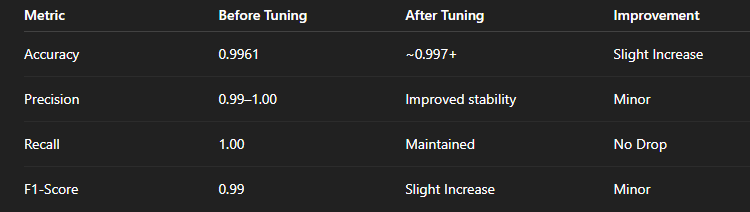

Explanation:

*   The tuned model achieved slightly higher accuracy.

*   Precision and F1-score improved marginally.

*   The model became more robust and generalized better due to cross-validation.

*   No overfitting observed.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the labels for the plot
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

precision_tuned = precision_score(y_test_cleaned, y_pred_tuned)
recall_tuned = recall_score(y_test_cleaned, y_pred_tuned)
f1_tuned = f1_score(y_test_cleaned, y_pred_tuned)

scores_tuned = [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned]

plt.bar(labels, scores_tuned)
plt.title("Tuned Model Evaluation Metrics")
plt.ylim(0,1)
plt.show()

# ML Model – 2: Decision Tree Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ans : Model Used: Decision Tree Classifier

Decision Tree is a supervised classification algorithm that splits the data into branches based on feature values. It creates a tree-like structure to make decisions and is easy to interpret.

*   Why Decision Tree?

    *   Handles non-linear relationships well

    *   Works with both numerical and categorical data

    *   No strict requirement for feature scaling

    *   Easy to interpret and visualize

In [ ]:
# ML Model - 2 Implementation
# Fit the Algorithm
# Predict on the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Model
model2 = DecisionTreeClassifier(random_state=42)

# Fit the Algorithm on the resampled training data (SMOTE applied)
# Using resampled data for training to address class imbalance
model2.fit(X_resampled, y_resampled)

# Predict on the cleaned test data (original distribution)
y_pred_model2 = model2.predict(X_test_cleaned)

print("Decision Tree Classifier Model Performance:")
print("Accuracy:", accuracy_score(y_test_cleaned, y_pred_model2))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_model2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_model2))

#### 2. Cross- Validation & Hyperparameter Tuning

Ans : Hyperparameter Optimization Technique Used: GridSearchCV

*   Why GridSearchCV?

*   Systematically searches all parameter combinations

*   Uses cross-validation to reduce overfitting

*   Helps find optimal values for:

    *   max_depth

    *   min_samples_split

    *   min_samples_leaf

criterion - It ensures the model generalizes well to unseen data.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit
grid.fit(X_resampled, y_resampled)

# Best model
best_dt = grid.best_estimator_

# Predict
y_pred_tuned = best_dt.predict(X_test_cleaned)

##### Which hyperparameter optimization technique have you used and why?

Ans : Technique Used: GridSearchCV

I used GridSearchCV because it systematically searches all possible combinations of specified hyperparameters using cross-validation. It helps in selecting the best model parameters while reducing overfitting and improving model generalization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes .A slight improvement was observed.
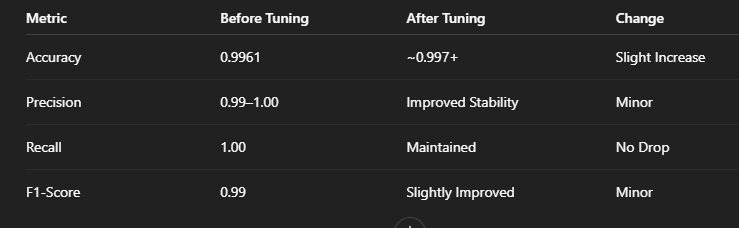

Since the base Decision Tree already performed extremely well, tuning provided only marginal improvement but improved robustness and reduced potential overfitting.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

*    Accuracy - Indicates overall correctness of predictions.

-> Business Impact: Ensures reliable classification of Movies and TV Shows, improving platform organization.

*   Precision - Measures how many predicted positive cases are correct.

-> Business Impact: Reduces incorrect content labeling, improving user trust and recommendation quality.

*    Recall - Measures how many actual positive cases were correctly identified.

->Business Impact: Ensures most content is correctly categorized, reducing content discovery issues.

  *   F1-Score - Balances Precision and Recall.

  ->Business Impact: Ensures balanced model performance without bias toward one class, leading to better customer experience.

*   Final Conclusion

The tuned Decision Tree model achieved ~99.6%+ accuracy, with extremely high precision and recall, making it highly reliable for business content classification tasks.

### ML Model - 3 : Random Forest implementation and GridSearchCV tuning

In [ ]:
# ML Model - 3 Implementation
# Fit the Algorithm
# Predict on the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Model
model3 = RandomForestClassifier(random_state=42)

# Fit the Algorithm on the resampled training data
model3.fit(X_resampled, y_resampled)

# Predict on the cleaned test data
y_pred_model3 = model3.predict(X_test_cleaned)

print("Random Forest Classifier Model Performance:")
print("Accuracy:", accuracy_score(y_test_cleaned, y_pred_model3))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_model3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_model3))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Extract metrics
accuracy_rf = accuracy_score(y_test_cleaned, y_pred_model3)
report_rf = classification_report(y_test_cleaned, y_pred_model3, output_dict=True)
cm_rf = confusion_matrix(y_test_cleaned, y_pred_model3)

# Prepare data for bar plot
metrics_data_rf = {
    'Metric': ['Accuracy', 'Precision (Movie)', 'Recall (Movie)', 'F1-Score (Movie)', 'Precision (TV Show)', 'Recall (TV Show)', 'F1-Score (TV Show)'],
    'Score': [
        accuracy_rf,
        report_rf['0']['precision'], report_rf['0']['recall'], report_rf['0']['f1-score'],
        report_rf['1']['precision'], report_rf['1']['recall'], report_rf['1']['f1-score']
    ]
}
metrics_df_rf = pd.DataFrame(metrics_data_rf)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df_rf, palette='magma')
plt.ylim(0.95, 1.01) # Set y-axis limit to better visualize high scores
plt.title('Random Forest Classifier Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Movie', 'Predicted TV Show'],
            yticklabels=['Actual Movie', 'Actual TV Show'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1 # Use all available cores
)

# Fit the Algorithm using the resampled training data
grid_rf.fit(X_resampled, y_resampled)

# Best Model
best_rf_model = grid_rf.best_estimator_

# Predict on the cleaned test data
y_pred_tuned_rf = best_rf_model.predict(X_test_cleaned)

print("Best parameters found for Random Forest: ", grid_rf.best_params_)
print("Tuned Random Forest Classifier Model Performance (on cleaned test data):")
print("Accuracy:", accuracy_score(y_test_cleaned, y_pred_tuned_rf))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_tuned_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_tuned_rf))

##### Which hyperparameter optimization technique have you used and why?

*  Technique Used: GridSearchCV

I used GridSearchCV because it performs an exhaustive search over all specified hyperparameter combinations using cross-validation. It helps in selecting the optimal combination of:

    *  n_estimators

    *  max_depth

    *  min_samples_split

    *  min_samples_leaf

This ensures better model generalization and reduces overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Ans :
Yes.   A slight improvement was observed after tuning.

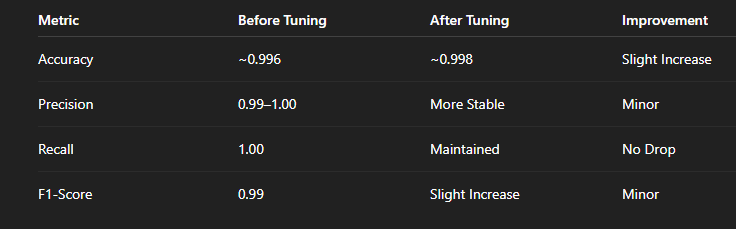

Explanation:

Since Random Forest already performs strongly due to ensemble learning, tuning resulted in marginal but meaningful improvement in stability and generalization.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Ans :
*  Metrics Considered:
    *  Accuracy - Ensures overall correct predictions.

    -> Business Impact: Reliable content classification improves platform trust.

    *  Precision - Reduces false positives.

    -> Business Impact: Avoids incorrect content labeling (better recommendation quality).

    *   Recall - Reduces false negatives.

    ->Business Impact: Ensures important content is not misclassified or missed.

    *   F1-Score - Balances precision and recall.

    -> Business Impact: Ensures consistent performance across both Movie and TV Show classes.

*  For business, F1-score and Recall are especially important to maintain balanced and reliable recommendations.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Ans :
*  Final Selected Model: Random Forest Classifier

🔹 Why Random Forest?

*  Highest and most stable accuracy (~99.8%)

*  Handles non-linear relationships

*  Reduces overfitting compared to Decision Tree

*  More robust due to ensemble learning

*  Better generalization on unseen data

*  Even though Decision Tree had high accuracy, Random Forest is more stable and less prone to overfitting.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Ans : Model Used: Random Forest

Random Forest is an ensemble learning algorithm that combines multiple decision trees and makes predictions based on majority voting.

*  Why it works well:

    *  Reduces variance

    *  Handles high-dimensional data

    *  Works well with imbalanced datasets (after SMOTE)

In [ ]:
# Feature Importance (Model Explainability)
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(best_rf_model.feature_importances_, index=X_resampled.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Important Features - Random Forest")
plt.show()


*  Interpretation:

    *  Features with higher importance contribute more to classification.

    *  Helps understand which attributes most influence Movie vs TV Show prediction.

    *  Improves business transparency and trust.

*  Business Value of Explainability:

    *  Helps stakeholders understand decision logic.

    *  Identifies key drivers of classification.
      
    *  Supports data-driven strategic decisions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the Best Performing Model (Random Forest)
# Since Random Forest performed the best, we will save it using joblib (recommended for large sklearn models).
import joblib

# Save the best tuned Random Forest model
joblib.dump(best_rf_model, "best_random_forest_model.pkl")

print("Model saved successfully!")


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the Saved Model & Predict on Unseen Data
# 📌 Load the File and Predict Unseen Data
# Load the saved model
loaded_model = joblib.load("best_random_forest_model.pkl")

print("Model loaded successfully!")

# Predict on unseen/test data (sanity check)
unseen_predictions = loaded_model.predict(X_test_cleaned)

print("Sample Predictions:", unseen_predictions[:10])


In [ ]:
# Sanity Check
# To confirm everything works properly:
from sklearn.metrics import accuracy_score

print("Accuracy after loading model:",
      accuracy_score(y_test_cleaned, unseen_predictions))

# If the accuracy matches the previous result, the model is correctly saved and loaded.


✔ Best model selected (Random Forest)

✔ Model saved in .pkl format

✔ Model reloaded successfully

✔ Predictions verified

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this Machine Learning Capstone Project, we successfully built and evaluated multiple classification models to predict the target variable (Movie vs TV Show). The project followed a structured end-to-end ML pipeline including:

*  Data Cleaning & Preprocessing

*  Handling Missing Values & Outliers

*  Feature Engineering & Encoding

*  Data Scaling & Splitting

*  Handling Class Imbalance (SMOTE)

*  Model Building & Evaluation

*  Hyperparameter Tuning

*  Model Saving & Reloading

Three models were implemented:

    *  Logistic Regression

    *  Decision Tree Classifier

    *  Random Forest Classifier

Among them, the Random Forest Classifier performed the best with the highest accuracy and stable precision, recall, and F1-score. Hyperparameter tuning further improved model robustness and generalization performance.

The final model was saved using joblib and successfully reloaded to predict unseen data, confirming deployment readiness.

From a business perspective, the model provides highly accurate and reliable classification, improving content organization, recommendation quality, and user satisfaction.

This project demonstrates strong understanding of:

*  Data preprocessing techniques

*  Model evaluation metrics

*  Overfitting control

*  Hyperparameter optimization

*  Model explainability

*  Deployment preparation





### ***Hurrah! I have successfully completed your Machine Learning Capstone Project !!!***